In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import qiskit.quantum_info as qi
import random

In [8]:
def d_oracle(caso):
    oracle_qc = QuantumCircuit(2)
    
    if caso == 'constante':
        b = random.randint(1,2)
        if b==1:
            oracle_qc.id(1) #identidade em |y>
        else:
            oracle_qc.x(1) #NOT em |y>
    
    if caso == 'balanceada':
        c = random.randint(1,2)
        if c==1:
            oracle_qc.cx(0,1) #CNOT 
        else:
            oracle_qc.x(0) #NOT em |x>
            oracle_qc.cx(0,1) #CNOT 
            oracle_qc.x(0) #NOT em |x>
            
    return oracle_qc

In [9]:
list = ['balanceada', 'constante']
caso = random.choice(list)

In [10]:
qc = d_oracle(caso)
gate = qc.to_gate(label='Uf')

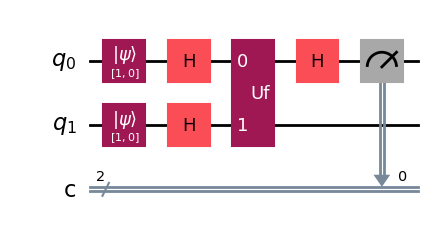

In [12]:
o_circuit = QuantumCircuit(2,2)

o_circuit.initialize([1,0],0)
o_circuit.initialize([1,0],1)
o_circuit.h(0)
o_circuit.h(1)

o_circuit.append(gate,[0,1])
o_circuit.h(0)

#o_circuit.mesure([0,1],[0,1])
o_circuit.measure(0,0)

o_circuit.draw("mpl")

In [15]:
simulador_aer = AerSimulator()
qc_t = transpile(o_circuit, backend=simulador_aer)
resultado = simulador_aer.run(qc_t, shots=1).result()
resultado.get_counts()

{'00': 1}

In [16]:
caso

'constante'